In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [140]:
%matplotlib inline

# Read data

## Payer

**Summary of data set:** Payer reimbursement rates for a given procedure code.

We will manually set data types for columns in the payer data if they do not read in as the correct type by default. Note that we read in `network_year_month` as an `object` column so that we can more easily convert it to Pandas Datetime in a later step.

In [21]:
payer_dtype_dict = {
    'network_year_month': object,
    'ein': object,
    'code': object,
}

In [22]:
payer_data = pd.read_csv('tic_extract_20250213.csv', dtype = payer_dtype_dict)

In [23]:
payer_data

,payer,network_name,network_id,network_year_month,network_region,code,code_type,ein,taxonomy_filtered_npi_list,modifier_list,billing_class,place_of_service_list,negotiation_type,arrangement,rate,cms_baseline_schedule,cms_baseline_rate
0,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,872,MS-DRG,131740114,"1003990763,1023202793,1063525152,1063606739,10...",NaN,institutional,NaN,negotiated,ffs,15902.00,IPPS,6829.75
1,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,99283,CPT,131624096,"1003255670,1245759711,1487026522,1598095267,16...",NaN,professional,11,negotiated,ffs,123.86,PFS_NONFACILITY_1320201,76.89
2,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,43239,CPT,131740114,"1700348620,1700892056,1922539964,1942685292",NaN,professional,11,negotiated,ffs,993.92,PFS_NONFACILITY_1320202,424.76
3,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,872,MS-DRG,133971298,"1245635200,1437523537,1528013695,1528432622,15...",NaN,institutional,NaN,negotiated,ffs,27924.63,IPPS,6829.75
4,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,43239,CPT,131740114,1346697315,NaN,professional,11,negotiated,ffs,849.63,PFS_NONFACILITY_1320203,391.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,cigna-corporation,national-oap,5dbd8f1c-3f56-4806-917b-e495668bf2bf,202501,USA,99283,CPT,133971298,"1083612089,1275632895,1346614443,1366541989,14...",NaN,institutional,NaN,fee schedule,ffs,2738.00,OPPS,276.89
218,cigna-corporation,national-oap,5dbd8f1c-3f56-4806-917b-e495668bf2bf,202501,USA,43239,CPT,131624096,"1124049713,1174551352,1205030228,1578581138",NaN,professional,"02,05,06,07,08,19,21,22,23,24,26,31,34,41,42,5...",fee schedule,ffs,164.00,PFS_FACILITY_1320201,151.42
219,cigna-corporation,national-oap,5dbd8f1c-3f56-4806-917b-e495668bf2bf,202501,USA,43239,CPT,133971298,"1023320298,1124118831,1134104615,1134325053,11...",NaN,professional,"01,03,04,09,11,12,13,14,15,16,17,18,20,25,32,3...",fee schedule,ffs,772.22,PFS_NONFACILITY_1320202,424.76
220,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,43239,CPT,131740114,"1003112954,1003175597,1003178732,1003226218,10...",NaN,professional,11,negotiated,ffs,2465.06,PFS_NONFACILITY_1320202,424.76


We now convert the `network_year_month` column to Pandas Datetime for easier evaluation.

In [29]:
payer_data['network_year_month'] = pd.to_datetime(payer_data['network_year_month'], format = '%Y%m')

### Data exploration

In [30]:
list(payer_data)

['payer',
 'network_name',
 'network_id',
 'network_year_month',
 'network_region',
 'code',
 'code_type',
 'ein',
 'taxonomy_filtered_npi_list',
 'modifier_list',
 'billing_class',
 'place_of_service_list',
 'negotiation_type',
 'arrangement',
 'rate',
 'cms_baseline_schedule',
 'cms_baseline_rate']

We visually view the data types for each column to ensure that they are correct.

In [31]:
payer_data.dtypes

payer                                 object
network_name                          object
network_id                            object
network_year_month            datetime64[ns]
network_region                        object
code                                  object
code_type                             object
ein                                   object
taxonomy_filtered_npi_list            object
modifier_list                         object
billing_class                         object
place_of_service_list                 object
negotiation_type                      object
arrangement                           object
rate                                 float64
cms_baseline_schedule                 object
cms_baseline_rate                    float64
dtype: object

It makes sense that `rate` and `cms_baseline_rate` are both `float64` values, since they both represent numeric quantities.

In [32]:
ProfileReport(payer_data, minimal = True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Key takeaways and comments:**

- We have 3 payers: aetna, unitedhealthcare, and cigna-corporation
- We have 3 codes: 43239, 99283, 872
- We have 2 billing classes: professional and institutional
- We have 3 negotiation types: negotiated, fee schedule, percentage

- **How do we identify the providers?**
    - This data must have a provider available somewhere. Payers negotiate rates with providers.
    - The `ein` value of 13-1740114 matches to the hospital `license_number` of 13-1740114.
- The values in `payer` don't match exactly by name to those in the hosptial data, even though we clearly know how to match them. We will have to adjust the values in one of the data sets to ensure that the records match.
- Why are there both CPT and MS-DRG codes?
    - The hospital data has a `code_type` column. Codes will likely need to be matched across both code number and code type.
- What does `ein` refer to?
    - Maybe the employer identification number; i.e., the customer of the payer. There doesn't appear to be a way to match it to the hospital data.
- What would we use `negotation_type` for here?
    - The hospital data seems to use negotation type in the `standard_charge_methodology` column.
- What would we use `billing_class` for here?

We run a quick check on the `payer`, `network_name`, and `network_id` columns to ensure that they map 1:1 with each other.

In [47]:
payer_data\
.reset_index()\
.groupby(['payer', 'network_name', 'network_id'], as_index = False)\
['index']\
.count()

,payer,network_name,network_id,index
0,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,133
1,cigna-corporation,national-oap,5dbd8f1c-3f56-4806-917b-e495668bf2bf,44
2,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,45


They all map to each other as expected. Because of this, we can just use one of these columns (e.g., `payer`) for future evaluation, since they all have the same meaning.

### Data cleaning

#### `payer_name`

We match the values of `payer` to those in the hospital data.

In [73]:
payer_short_name_mapping = {
    'cigna-corporation': 'cigna',
    'unitedhealthcare': 'uhc'
}

In [74]:
payer_data['payer'].replace(payer_short_name_mapping).value_counts(dropna = False)

aetna    133
uhc       45
cigna     44
Name: payer, dtype: int64

In [92]:
payer_data['payer_short'] = payer_data['payer'].replace(payer_short_name_mapping)

## Hospital

**Summary of data set:** Hospital-expected reimbursement rates for a given payer / plan and procedure code.

In [36]:
hospital_data = pd.read_csv('hpt_extract_20250213.csv')

In [37]:
hospital_data

,source_file_name,hospital_id,hospital_name,last_updated_on,hospital_state,license_number,payer_name,plan_name,code_type,raw_code,...,modifiers,standard_charge_gross,standard_charge_discounted_cash,standard_charge_negotiated_dollar,standard_charge_negotiated_percentage,standard_charge_min,standard_charge_max,standard_charge_methodology,additional_payer_notes,additional_generic_notes
0,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Aetna,Medicare,CPT,99283,...,NaN,NaN,NaN,323.34,NaN,83.78,1009.22,fee schedule,NaN,NaN
1,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,HealthFirst,Commercial Enrollees,CPT,43239,...,NaN,NaN,NaN,1037.65,NaN,165.40,3206.34,fee schedule,NaN,NaN
2,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Aetna,Commercial,CPT,43239,...,NaN,NaN,NaN,1246.73,NaN,1246.73,1394.79,fee schedule,NaN,NaN
3,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Cigna,LocalPlus,CPT,99283,...,NaN,3744.00,2433.60,1797.00,NaN,225.00,1797.00,other,NaN,per visit
4,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Oscar,Medicare,CPT,43239,...,NaN,NaN,NaN,1037.65,NaN,141.77,1815.10,fee schedule,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,133971298-1801992631_nyu-langone-tisch_standar...,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,NY,7002053H,bcbs,bcbsoutofstatehmo(suitcaselogo)2064,CPT,43239,...,NaN,NaN,NaN,7334.00,NaN,NaN,NaN,Case Rate,. All Add ons apply except drugs and lesser of...,NaN
2946,133971298-1801992631_nyu-langone-tisch_standar...,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,NY,7002053H,hip,hipepo1264,MS-DRG,MS-DRG 872,...,NaN,NaN,NaN,28411.27,NaN,NaN,NaN,Case Rate,Medicare Base Rate times Standard Inpatient We...,NaN
2947,133971298-1801992631_nyu-langone-tisch_standar...,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,NY,7002053H,bcbs,bcbsfederalprogram1182,CPT,99283,...,NaN,5106.17,970.17,5228.00,NaN,NaN,NaN,Case Rate,. Lesser of 100% of billed charges applies.,NaN
2948,133971298-1801992631_nyu-langone-tisch_standar...,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,NY,7002053H,ghi,ghiemblemhealthmedicarehmo1072,MS-DRG,MS-DRG 872,...,NaN,NaN,NaN,10076.87,NaN,NaN,NaN,Case Rate,Medicare Base Rate times Standard Inpatient We...,NaN


In [41]:
hospital_data.iloc[:,:11]

,source_file_name,hospital_id,hospital_name,last_updated_on,hospital_state,license_number,payer_name,plan_name,code_type,raw_code,description
0,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Aetna,Medicare,CPT,99283,EMERGENCY DEPT VISIT LOW MDM
1,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,HealthFirst,Commercial Enrollees,CPT,43239,EGD BIOPSY SINGLE/MULTIPLE
2,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Aetna,Commercial,CPT,43239,UPPER GI ENDOSCOPY BIOPSY
3,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Cigna,LocalPlus,CPT,99283,HC EMERGENCY DEPT VISIT LVL 3
4,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Oscar,Medicare,CPT,43239,EGD BIOPSY SINGLE/MULTIPLE
...,...,...,...,...,...,...,...,...,...,...,...
2945,133971298-1801992631_nyu-langone-tisch_standar...,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,NY,7002053H,bcbs,bcbsoutofstatehmo(suitcaselogo)2064,CPT,43239,EGD BIOPSY SINGLE/MULTIPLE
2946,133971298-1801992631_nyu-langone-tisch_standar...,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,NY,7002053H,hip,hipepo1264,MS-DRG,MS-DRG 872,SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...
2947,133971298-1801992631_nyu-langone-tisch_standar...,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,NY,7002053H,bcbs,bcbsfederalprogram1182,CPT,99283,HC EMERGENCY DEPT VISIT LVL 3
2948,133971298-1801992631_nyu-langone-tisch_standar...,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,NY,7002053H,ghi,ghiemblemhealthmedicarehmo1072,MS-DRG,MS-DRG 872,SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...


In [42]:
hospital_data.iloc[:,11:]

,setting,modifiers,standard_charge_gross,standard_charge_discounted_cash,standard_charge_negotiated_dollar,standard_charge_negotiated_percentage,standard_charge_min,standard_charge_max,standard_charge_methodology,additional_payer_notes,additional_generic_notes
0,outpatient,NaN,NaN,NaN,323.34,NaN,83.78,1009.22,fee schedule,NaN,NaN
1,outpatient,NaN,NaN,NaN,1037.65,NaN,165.40,3206.34,fee schedule,NaN,NaN
2,outpatient,NaN,NaN,NaN,1246.73,NaN,1246.73,1394.79,fee schedule,NaN,NaN
3,outpatient,NaN,3744.00,2433.60,1797.00,NaN,225.00,1797.00,other,NaN,per visit
4,outpatient,NaN,NaN,NaN,1037.65,NaN,141.77,1815.10,fee schedule,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2945,both,NaN,NaN,NaN,7334.00,NaN,NaN,NaN,Case Rate,. All Add ons apply except drugs and lesser of...,NaN
2946,inpatient,NaN,NaN,NaN,28411.27,NaN,NaN,NaN,Case Rate,Medicare Base Rate times Standard Inpatient We...,NaN
2947,both,NaN,5106.17,970.17,5228.00,NaN,NaN,NaN,Case Rate,. Lesser of 100% of billed charges applies.,NaN
2948,inpatient,NaN,NaN,NaN,10076.87,NaN,NaN,NaN,Case Rate,Medicare Base Rate times Standard Inpatient We...,NaN


### Data exploration

In [43]:
list(hospital_data)

['source_file_name',
 'hospital_id',
 'hospital_name',
 'last_updated_on',
 'hospital_state',
 'license_number',
 'payer_name',
 'plan_name',
 'code_type',
 'raw_code',
 'description',
 'setting',
 'modifiers',
 'standard_charge_gross',
 'standard_charge_discounted_cash',
 'standard_charge_negotiated_dollar',
 'standard_charge_negotiated_percentage',
 'standard_charge_min',
 'standard_charge_max',
 'standard_charge_methodology',
 'additional_payer_notes',
 'additional_generic_notes']

We visually view the data types for each column to ensure that they are correct.

In [44]:
hospital_data.dtypes

source_file_name                          object
hospital_id                               object
hospital_name                             object
last_updated_on                           object
hospital_state                            object
license_number                            object
payer_name                                object
plan_name                                 object
code_type                                 object
raw_code                                  object
description                               object
setting                                   object
modifiers                                 object
standard_charge_gross                    float64
standard_charge_discounted_cash          float64
standard_charge_negotiated_dollar        float64
standard_charge_negotiated_percentage    float64
standard_charge_min                      float64
standard_charge_max                      float64
standard_charge_methodology               object
additional_payer_not

In [45]:
ProfileReport(hospital_data, minimal = True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Key takeaways and comments:**
- We can match `code_type` from this data set with the `code_type` field in the payer data.
- We can match `raw_code` to the `code` value in the payer data, though we will have to correct the value MS-DRG 872 to remove MS-DRG in this data first.
- The values in `standard_charge_methodology` will need to be cleaned up to match those in the payer data. This should be doable with some simple capitalization adjustments.

- **The challenge may be to aggregate rates across `plan_name` -- i.e., how do we decide how to do this?**
- Is there any value in using the `setting` column?
    - From a business perspective, it probably means that the hospitals are doing different things and so might get different reimbursement. But it's unclear as to whether payers can identify this.

We run a quick check on the `source_file_name`, `hospital_id`, `hospital_name`, and `license_number` columns to ensure that they map 1:1 with each other.

In [49]:
hospital_data\
.reset_index()\
.groupby(['source_file_name', 'hospital_id', 'hospital_name', 'license_number'], as_index = False)\
['index']\
.count()

,source_file_name,hospital_id,hospital_name,license_number,index
0,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,13-1740114,380
1,131624096_mount-sinai-hospital_standardcharges...,5954cbad-a7c5-43f7-b356-8f2ecdad579a,The Mount Sinai Hospital,330024,248
2,133971298-1801992631_nyu-langone-tisch_standar...,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,7002053H,2322


They all map to each other as expected. Because of this, we can just use one of these columns (e.g., `hospital_name`) for future evaluation, since they all have the same meaning.

### Data cleaning

#### `payer_name`

We lowercase `payer_name` to get it to match to the values in the payer data.

In [111]:
hospital_data['payer_name'].str.lower().value_counts(dropna = False)

hip                392
medicare           336
multiplan          299
bcbs               273
healthfirst        169
                  ... 
centivo              2
horizon              2
vns                  2
american             1
brighton health      1
Name: payer_name, Length: 61, dtype: int64

In [112]:
hospital_data['payer_name_lower'] = hospital_data['payer_name'].str.lower()

#### `license_number`

We make a slight tweak to `license_number` to get it to match with `ein` in the payer data.

In [76]:
hospital_data['license_number'].str.replace(r'[^a-zA-Z0-9]', '', regex=True).value_counts(dropna = False)

7002053H     2322
131740114     380
330024        248
Name: license_number, dtype: int64

In [77]:
hospital_data['payer_ein'] = hospital_data['license_number'].str.replace(r'[^a-zA-Z0-9]', '', regex=True)

#### `raw_code`

We correct the value of `raw_code` as noted above.

In [50]:
hospital_data['raw_code'].value_counts(dropna = False)

43239         1526
99283         1046
MS-DRG 872     290
872             88
Name: raw_code, dtype: int64

We do a quick check on the `raw_code` value `MS-DRG 872` to ensure that all of the corresponding values of `code_type` are in fact `MS-DRG`.

In [52]:
hospital_data[hospital_data['raw_code'] == 'MS-DRG 872']['code_type'].value_counts(dropna = False)

MS-DRG    290
Name: code_type, dtype: int64

They are, so we are good to proceed.

We run a regex to remove all non-numeric characters from the `raw_code` string, and check the unique output values.

In [59]:
hospital_data['raw_code'].str.replace(r'\D', '', regex=True).value_counts(dropna = False)

43239    1526
99283    1046
872       378
Name: raw_code, dtype: int64

The output values make sense, so we will save this transformation back to the `raw_code` column.

In [60]:
hospital_data['raw_code'] = hospital_data['raw_code'].str.replace(r'\D', '', regex=True)

#### `standard_charge_methodology`

We correct the values of `standard_charge_methodology` as noted above.

In [62]:
hospital_data['standard_charge_methodology'].value_counts(dropna = False)

Case Rate                          1316
percent of total billed charges     613
fee schedule                        322
Fee Schedule                        224
NaN                                 214
case rate                            81
Case rate                            80
Percent of total billed charges      51
other                                34
Other                                 8
5228                                  2
per diem                              1
93157.15                              1
11671                                 1
32829.5                               1
17412.69                              1
Name: standard_charge_methodology, dtype: int64

We first convert to titlecase to standardize the text values.

In [65]:
hospital_data['standard_charge_methodology'].str.title().value_counts(dropna = False)

Case Rate                          1477
Percent Of Total Billed Charges     664
Fee Schedule                        546
NaN                                 214
Other                                42
5228                                  2
Per Diem                              1
93157.15                              1
11671                                 1
32829.5                               1
17412.69                              1
Name: standard_charge_methodology, dtype: int64

In [66]:
hospital_data['standard_charge_methodology'] = hospital_data['standard_charge_methodology'].str.title()

Then, we map them to the same set of values as the payer data so that we can remove the values that are not meaningful. Note that values that are not mapped (i.e., not in the keys of the dictionary) will be set to `NaN`.

**Assumption**: Case Rate means the same thing as negotiated. 

In [67]:
hospital_charge_mapping = {
    'Case Rate': 'negotiated',
    'Percent Of Total Billed Charges': 'percentage',
    'Fee Schedule': 'fee schedule'
}

In [69]:
hospital_data['standard_charge_methodology'].map(hospital_charge_mapping).value_counts(dropna = False)

negotiated      1477
percentage       664
fee schedule     546
NaN              263
Name: standard_charge_methodology, dtype: int64

In [70]:
hospital_data['charge_methodology_corrected'] = hospital_data['standard_charge_methodology'].map(hospital_charge_mapping)

# Data integration

We do some quick checks on the payer and ein fields to ensure that values match.

In [123]:
set(payer_data['payer_short']).difference(hospital_data['payer_name'])

set()

In [124]:
set(payer_data['payer_short']).intersection(hospital_data['payer_name'])

{'aetna', 'cigna', 'uhc'}

In [125]:
payer_data['payer_short'].dtype

dtype('O')

In [126]:
hospital_data['payer_name'].dtype

dtype('O')

In [127]:
set(payer_data['ein']).difference(hospital_data['payer_ein'])

{'131624096', '133971298'}

In [128]:
set(payer_data['ein']).intersection(hospital_data['payer_ein'])

{'131740114'}

In [129]:
payer_data['ein'].dtype

dtype('O')

In [130]:
hospital_data['payer_ein'].dtype

dtype('O')

We will merge the payer and hospital data on the following matching keys between the data sets:
- Payer: `payer_short` (payer_data), `payer_name_lower` (hospital data)
- Provider: `ein` (payer_data), `payer_ein` (hospital data)
- Procedure code: `code` (payer_data), `raw_code` (hospital data)
- Procedure code type: `code_type` (payer_data), `code_type` (hospital data)
- Charge methodology: `negotiation_type` (payer_data), `charge_methodology_corrected` (hospital data)

We will add keys to the merge and ensure that a non-zero record count is returned (i.e., keys match between the two data sets). 

In [114]:
pd.merge(payer_data,
         hospital_data,
         left_on = ['payer_short'],
         right_on = ['payer_name_lower'],
         how = 'inner')\
.shape[0]

28309

In [88]:
pd.merge(payer_data,
         hospital_data,
         left_on = ['ein'],
         right_on = ['payer_ein'],
         how = 'inner')\
.shape[0]

44840

In [115]:
pd.merge(payer_data,
         hospital_data,
         left_on = ['payer_short', 'ein'],
         right_on = ['payer_name_lower', 'payer_ein'],
         how = 'inner')\
.shape[0]

1797

In [116]:
pd.merge(payer_data,
         hospital_data,
         left_on = ['payer_short', 'ein', 'code', 'code_type'],
         right_on = ['payer_name_lower', 'payer_ein', 'raw_code', 'code_type'],
         how = 'inner')\
.shape[0]

747

In [117]:
pd.merge(payer_data,
         hospital_data,
         left_on = ['payer_short', 'ein', 'code', 'code_type', 'negotiation_type'],
         right_on = ['payer_name_lower', 'payer_ein', 'raw_code', 'code_type', 'charge_methodology_corrected'],
         how = 'inner')\
.shape[0]

128

In [131]:
payer_hospital_match =\
pd.merge(payer_data,
         hospital_data,
         left_on = ['payer_short', 'ein', 'code', 'code_type', 'negotiation_type'],
         right_on = ['payer_name_lower', 'payer_ein', 'raw_code', 'code_type', 'charge_methodology_corrected'],
         how = 'inner')

In [132]:
payer_hospital_match

,payer,network_name,network_id,network_year_month,network_region,code,code_type,ein,taxonomy_filtered_npi_list,modifier_list,...,standard_charge_negotiated_dollar,standard_charge_negotiated_percentage,standard_charge_min,standard_charge_max,standard_charge_methodology,additional_payer_notes,additional_generic_notes,charge_methodology_corrected,payer_ein,payer_name_lower
0,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,2025-01-01,USA,43239,CPT,131740114,1063525152,NaN,...,4343.00,NaN,2518.00,9347.00,Case Rate,NaN,NaN,negotiated,131740114,aetna
1,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,2025-01-01,USA,43239,CPT,131740114,1063525152,NaN,...,4859.00,NaN,2518.00,9347.00,Case Rate,NaN,NaN,negotiated,131740114,aetna
2,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,2025-01-01,USA,43239,CPT,131740114,NaN,NaN,...,4343.00,NaN,2518.00,9347.00,Case Rate,NaN,NaN,negotiated,131740114,aetna
3,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,2025-01-01,USA,43239,CPT,131740114,NaN,NaN,...,4859.00,NaN,2518.00,9347.00,Case Rate,NaN,NaN,negotiated,131740114,aetna
4,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,2025-01-01,USA,43239,CPT,131740114,"1063525152,1871939728",NaN,...,4343.00,NaN,2518.00,9347.00,Case Rate,NaN,NaN,negotiated,131740114,aetna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,cigna-corporation,national-oap,5dbd8f1c-3f56-4806-917b-e495668bf2bf,2025-01-01,USA,43239,CPT,131740114,"1588761316,1700227949,1881983518",NaN,...,841.81,NaN,146.49,1733.49,Fee Schedule,NaN,NaN,fee schedule,131740114,cigna
124,cigna-corporation,national-oap,5dbd8f1c-3f56-4806-917b-e495668bf2bf,2025-01-01,USA,43239,CPT,131740114,"1033707500,1043398480,1083445795,1184269912,11...",NaN,...,841.81,NaN,146.49,1733.49,Fee Schedule,NaN,NaN,fee schedule,131740114,cigna
125,cigna-corporation,national-oap,5dbd8f1c-3f56-4806-917b-e495668bf2bf,2025-01-01,USA,43239,CPT,131740114,"1033707500,1043398480,1083445795,1184269912,11...",NaN,...,841.81,NaN,146.49,1733.49,Fee Schedule,NaN,NaN,fee schedule,131740114,cigna
126,cigna-corporation,national-oap,5dbd8f1c-3f56-4806-917b-e495668bf2bf,2025-01-01,USA,43239,CPT,131740114,"1033707500,1043398480,1083445795,1184269912,11...",NaN,...,841.81,NaN,146.49,1733.49,Fee Schedule,NaN,NaN,fee schedule,131740114,cigna


In [134]:
ProfileReport(payer_hospital_match, minimal = True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

While `payer` and `negotiation_type` do not semantically mean the same thing, we see the same value counts for both. It's possible that for this specific sample, they do. We can check whether this is the case.

In [136]:
payer_hospital_match\
.reset_index()\
.groupby(['payer', 'negotiation_type'], as_index = False)\
['index']\
.count()

,payer,negotiation_type,index
0,aetna,negotiated,80
1,cigna-corporation,fee schedule,48


They do, and so we can use them interchangeably.

In [137]:
payer_hospital_match\
.reset_index()\
.groupby(['payer', 'plan_name'], as_index = False)\
['index']\
.count()

,payer,plan_name,index
0,aetna,ASA,40
1,aetna,Commercial,40
2,cigna-corporation,Lifesource,24
3,cigna-corporation,LocalPlus,24


**Key takeaways and comments:**

- There are 2 payers and negotiation types: Aetna (negotiated) and Cigna (fee schedule)

- There are 2 codes: 43239 and 99283

- There is only 1 hospital: Montefiore Medical Center

- There are 4 plans: ASA and Commercial (Aetna) and Lifesource and LocalPlus (Cigna)

We have the following rate columns:

- `rate`
- `cms_baseline_rate`
- `standard_charge_gross`
- `standard_charge_discounted_cash`
- `standard_charge_negotiated_dollar`
- `standard_charge_min`
- `standard_charge_max`

We will plot the distributions of these columns so that we can get a high-level understanding of them.

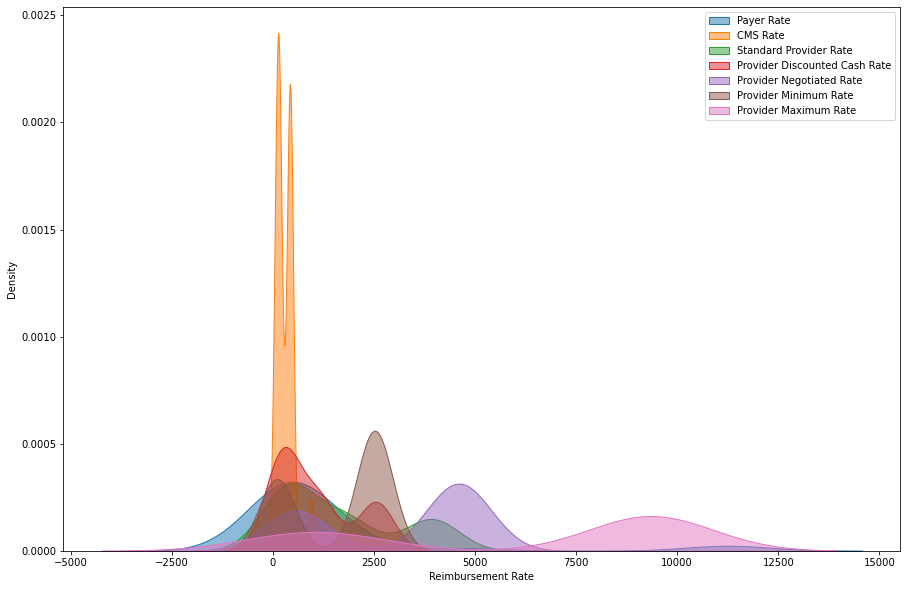

In [154]:
plt.figure(figsize = (15, 10))
sns.kdeplot(payer_hospital_match['rate'], label = 'Payer Rate', fill = True, alpha = 0.5)
sns.kdeplot(payer_hospital_match['cms_baseline_rate'], label = 'CMS Rate', fill = True, alpha = 0.5)
sns.kdeplot(payer_hospital_match['standard_charge_gross'], label = 'Standard Provider Rate', fill = True, alpha = 0.5)
sns.kdeplot(payer_hospital_match['standard_charge_discounted_cash'], label = 'Provider Discounted Cash Rate', fill = True, alpha = 0.5)
sns.kdeplot(payer_hospital_match['standard_charge_negotiated_dollar'], label = 'Provider Negotiated Rate', fill = True, alpha = 0.5)
sns.kdeplot(payer_hospital_match['standard_charge_min'], label = 'Provider Minimum Rate', fill = True, alpha = 0.5)
sns.kdeplot(payer_hospital_match['standard_charge_max'], label = 'Provider Maximum Rate', fill = True, alpha = 0.5)
plt.xlabel('Reimbursement Rate')
plt.legend()

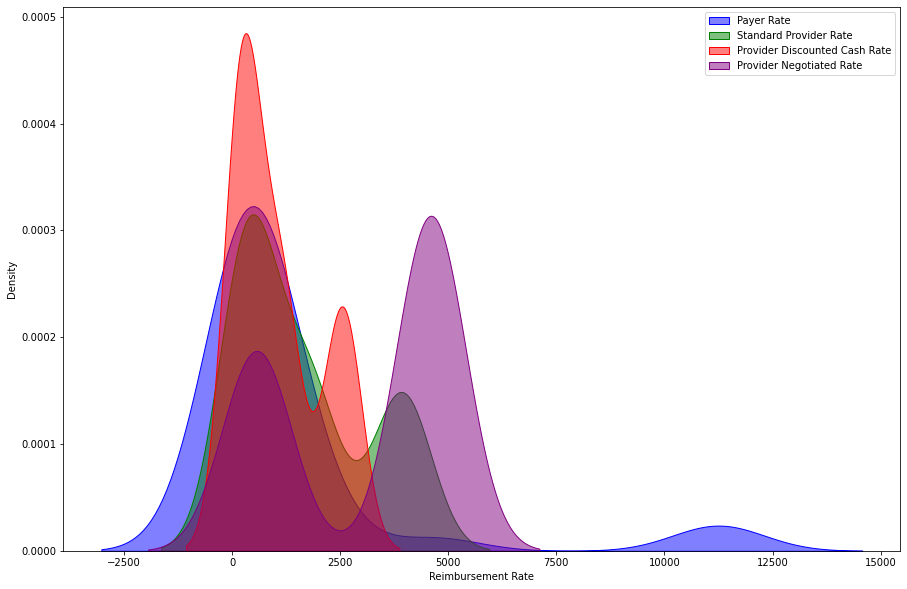

In [161]:
plt.figure(figsize = (15, 10))
sns.kdeplot(payer_hospital_match['rate'], label = 'Payer Rate', fill = True, alpha = 0.5, color = 'blue')
sns.kdeplot(payer_hospital_match['standard_charge_gross'], label = 'Standard Provider Rate', fill = True, alpha = 0.5, color = 'green')
sns.kdeplot(payer_hospital_match['standard_charge_discounted_cash'], label = 'Provider Discounted Cash Rate', fill = True, alpha = 0.5, color = 'red')
sns.kdeplot(payer_hospital_match['standard_charge_negotiated_dollar'], label = 'Provider Negotiated Rate', fill = True, alpha = 0.5, color = 'purple')
plt.xlabel('Reimbursement Rate')
plt.legend()

To choose the best rate to use, we will want to drill down to the level of plan and code, since we only have 1 hospital and negotiation type is aligned with payer.

In [162]:
payer_hospital_match\
.reset_index()\
.groupby(['plan_name', 'code'], as_index = False)\
['index']\
.count()

,plan_name,code,index
0,ASA,43239,40
1,Commercial,43239,40
2,Lifesource,43239,12
3,Lifesource,99283,12
4,LocalPlus,43239,12
5,LocalPlus,99283,12


In [163]:
payer_hospital_match[['plan_name', 'code']].drop_duplicates()

,plan_name,code
0,Commercial,43239
1,ASA,43239
80,Lifesource,99283
81,LocalPlus,99283
104,LocalPlus,43239
105,Lifesource,43239


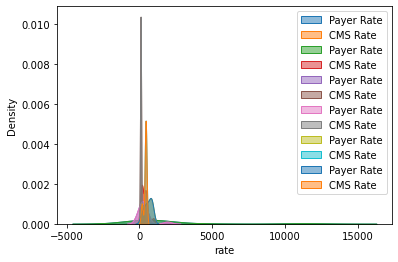

In [177]:
for idx, row in payer_hospital_match[['plan_name', 'code']].drop_duplicates().iterrows():
    payer_hospital_match_subset = payer_hospital_match[(payer_hospital_match['plan_name'] == row[0]) &
                                                       (payer_hospital_match['code'] == row[1])]
    sns.kdeplot(payer_hospital_match_subset['rate'], label = 'Payer Rate', fill = True, alpha = 0.5)
    sns.kdeplot(payer_hospital_match_subset['cms_baseline_rate'], label = 'CMS Rate', fill = True, alpha = 0.5)
    plt.legend()

In [179]:
payer_hospital_match_melt = payer_hospital_match.melt(id_vars = ['plan_name', 'code'], value_vars = ['rate', 'cms_baseline_rate', 'standard_charge_gross', 'standard_charge_discounted_cash', 'standard_charge_negotiated_dollar', 'standard_charge_min', 'standard_charge_max'], var_name = 'Charge Type', value_name = 'Value')

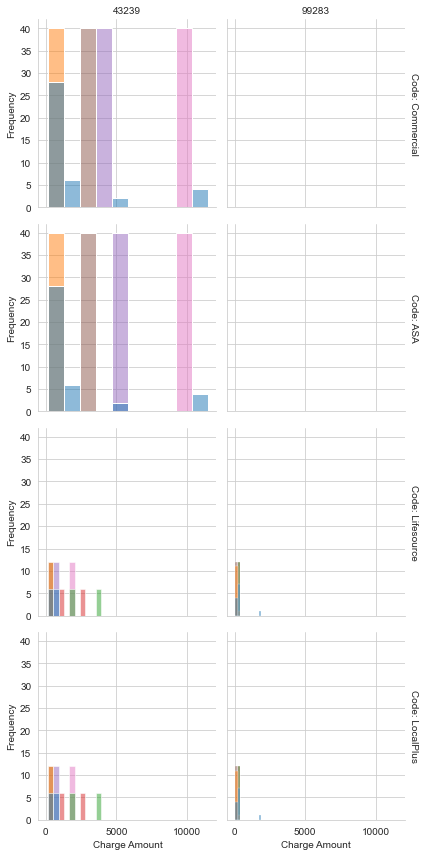

In [186]:
# Create FacetGrid
g = sns.FacetGrid(payer_hospital_match_melt, col="code", row="plan_name", margin_titles=True, sharex=True, sharey=True)

# Map the histplot to the FacetGrid
g.map_dataframe(sns.histplot, x="Value", hue="Charge Type", bins=10, alpha=0.5, kde=False)

# Add titles
g.set_axis_labels("Charge Amount", "Frequency")
g.set_titles(col_template="{col_name}", row_template="Code: {row_name}")